In [1]:
import json 
import time
import requests
import urllib, urllib2
from lxml import html
from lxml import etree
import locale
import random
import pymongo
from selenium import webdriver  
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Connect to mongo
conn = pymongo.MongoClient()
db = conn.faces
collection1 = db.facesMeta

In [3]:
data = pd.DataFrame(list(collection1.find()))

In [4]:
data.columns


Index([       u'_id',  u'attribute',    u'face_id', u'fbPageName',
       u'img_height',  u'img_width',   u'position',       u'svid',
              u'tag',        u'url'],
      dtype='object')

In [5]:
attributes=data[u'attribute'].apply(pd.Series)

In [6]:
attributes.columns

Index([u'age', u'gender', u'pose', u'race', u'smiling'], dtype='object')

In [7]:
data['gender'] = attributes['gender'].apply(pd.Series)['value']
data['age'] = attributes['age'].apply(pd.Series)['value']
data['race'] = attributes['race'].apply(pd.Series)['value']

In [9]:
data['gender'].value_counts()

Female    11222
Male       9693
dtype: int64

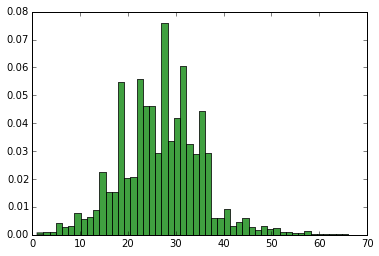

In [10]:
%matplotlib inline
plt.hist(data['age'], 50, normed=1, facecolor='g', alpha=0.75)
plt.show()